In [1]:
!pip install matplotlib


Approximate root: -1.500000 after 0 iterations.


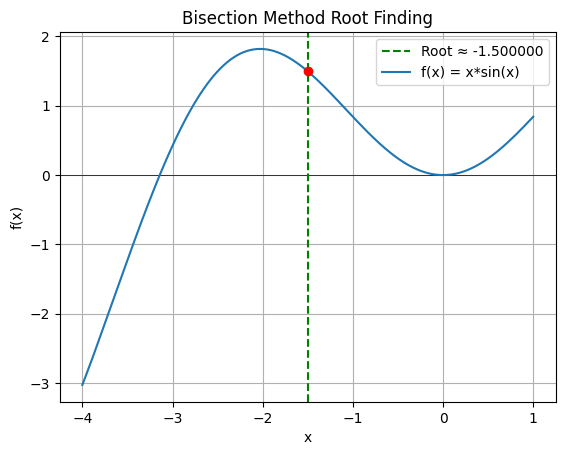

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# Step 1: Take function input from user
x = sp.Symbol('x')
func_str = input("Enter the function f(x): ")  # e.g. x**3 - x - 2
f = sp.lambdify(x, sp.sympify(func_str), 'numpy')  # Convert to numerical function

# Step 2: Input interval and tolerance
a = float(input("Enter left endpoint a: "))
b = float(input("Enter right endpoint b: "))
tol = float(input("Enter tolerance: "))
max_iter = 100

# Step 3: Check if root exists in [a, b]
if f(a) * f(b) >= 0:
    print("Bisection method fails: f(a) and f(b) must have opposite signs.")
else:
    # Step 4: Bisection Method
    iteration = 0
    while (b - a) / 2 > tol and iteration < max_iter:
        c = (a + b) / 2
        if f(c) == 0:
            break
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
        iteration += 1

    root = (a + b) / 2
    print(f"Approximate root: {root:.6f} after {iteration} iterations.")

    # Step 5: Plotting
    x_vals = np.linspace(a - 1, b + 1, 400)
    y_vals = f(x_vals)

    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(root, color='green', linestyle='--', label=f"Root ≈ {root:.6f}")
    plt.plot(x_vals, y_vals, label=f'f(x) = {func_str}')
    plt.scatter(root, f(root), color='red', zorder=5)
    plt.title("Bisection Method Root Finding")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

## Secant method 


Approximate root: 0.001294 after 10 iterations.


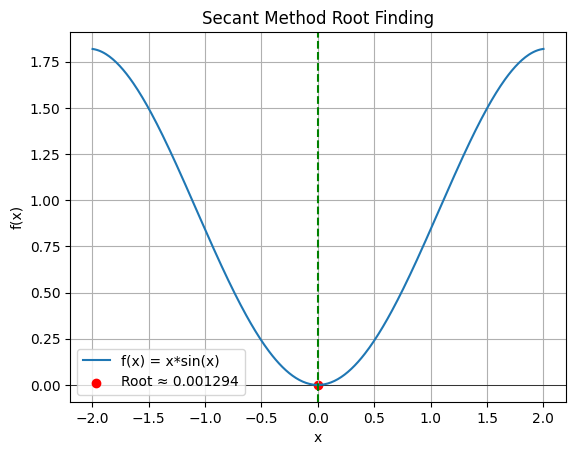

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# Step 1: User input function
x = sp.Symbol('x')
func_str = input("Enter the function f(x): ")  # e.g. x**3 - x - 2
f = sp.lambdify(x, sp.sympify(func_str), 'numpy')

# Step 2: Initial guesses and tolerance
x0 = float(input("Enter first initial guess x0: "))
x1 = float(input("Enter second initial guess x1: "))
tol = float(input("Enter tolerance: "))
max_iter = 100

# Step 3: Secant Method
iteration = 0
while abs(x1 - x0) > tol and iteration < max_iter:
    try:
        fx0 = f(x0)
        fx1 = f(x1)
        if fx1 - fx0 == 0:
            print("Division by zero error in Secant method.")
            break
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        x0, x1 = x1, x2
        iteration += 1
    except Exception as e:
        print(f"Error during iteration: {e}")
        break

root = x1
print(f"Approximate root: {root:.6f} after {iteration} iterations.")

# Step 4: Plotting
x_vals = np.linspace(x0 - 2, x1 + 2, 400)
y_vals = f(x_vals)

plt.axhline(0, color='black', linewidth=0.5)
plt.plot(x_vals, y_vals, label=f'f(x) = {func_str}')
plt.scatter(root, f(root), color='red', label=f"Root ≈ {root:.6f}")
plt.axvline(root, color='green', linestyle='--')
plt.title("Secant Method Root Finding")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

##  Newton forward elimination

Estimated value at x = 2.5 is 36.8125


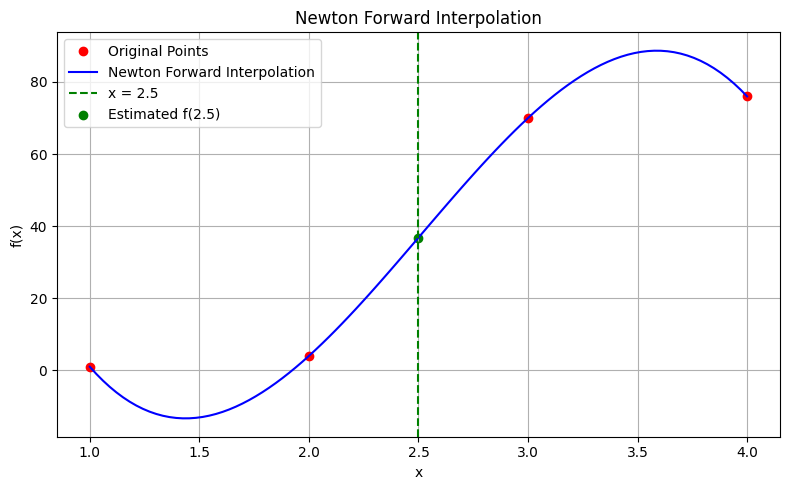

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# Newton Forward Interpolation function
def newton_forward(x_vals, y_vals, x):
    n = len(x_vals)
    h = x_vals[1] - x_vals[0]

    # Create difference table
    diff = [y_vals[:]]
    for i in range(1, n):
        current = []
        for j in range(n - i):
            current.append(diff[i - 1][j + 1] - diff[i - 1][j])
        diff.append(current)

    # Calculate u
    u = (x - x_vals[0]) / h

    # Apply formula
    result = y_vals[0]
    u_term = 1
    for i in range(1, n):
        u_term *= (u - (i - 1))
        result += (u_term * diff[i][0]) / factorial(i)

    return result

# Sample data
x_vals = [1, 2, 3, 4]
y_vals = [1, 4, 70, 76]

# Estimate a value (for example, at x = 2.5)
x_target = 2.5
y_estimated = newton_forward(x_vals, y_vals, x_target)
print(f"Estimated value at x = {x_target} is {y_estimated}")

# Plotting the results
x_interp = np.linspace(min(x_vals), max(x_vals), 100)
y_interp = [newton_forward(x_vals, y_vals, xi) for xi in x_interp]

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, 'ro', label="Original Points")
plt.plot(x_interp, y_interp, 'b-', label="Newton Forward Interpolation")
plt.axvline(x=x_target, color='green', linestyle='--', label=f'x = {x_target}')
plt.scatter([x_target], [y_estimated], color='green', label=f'Estimated f({x_target})')
plt.title("Newton Forward Interpolation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()